In [2]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 6.8 MB/s 


In [3]:
from pathlib import Path
from nilearn import image
import nilearn
from nilearn import plotting
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/NEUROML")
    
    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"
    
    import sys
    sys.path.append(str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path(".")

Mounted at /content/drive


## Seminar 6.1 : Extract ICA components from fMRI data

In [28]:
subject_path =AUX_DATA_ROOT / 'data/sub-A00037224_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
subject_path =AUX_DATA_ROOT / 'data/sub-A00037224_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz'

In [29]:
fmri_file =image.load_img(subject_path)

In [30]:
fmri_file.shape

(91, 109, 91, 150)

In [31]:
first_fmri = image.index_img(fmri_file, 2)
print(first_fmri.shape)

(91, 109, 91)


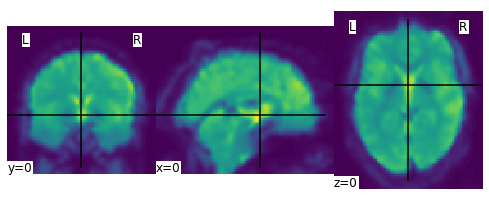

In [32]:
nilearn.plotting.plot_img(first_fmri, cut_coords=(0,0,0))

In [33]:
from nilearn.maskers import NiftiMasker

# # This is fmri timeseries data: the background has not been removed yet,
# # thus we need to use mask_strategy='epi' to compute the mask from the
# # EPI images
masker = NiftiMasker(smoothing_fwhm=8, memory='nilearn_cache', memory_level=1,
                     mask_strategy='epi', standardize=True)
data_masked = masker.fit_transform(fmri_file)

/usr/local/lib/python3.7/dist-packages/nilearn/maskers/nifti_masker.py:453: UserWarning: Persisting input arguments took 1.04s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  imgs, verbose=max(0, self.verbose - 1), **mask_args
/usr/local/lib/python3.7/dist-packages/nilearn/maskers/nifti_masker.py:589: UserWarning: Persisting input arguments took 1.12s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  

In [34]:
data_masked.shape

(150, 551376)

In [35]:
from sklearn.decomposition import FastICA
n_components = 30
ica = FastICA(n_components=n_components, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T

In [36]:
components_masked.shape

(30, 551376)

In [18]:
# Normalize estimated components, for thresholding to make sense
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
# Threshold
components_masked[np.abs(components_masked) < 0.8] = 0

(array([1.05000e+02, 1.51400e+03, 4.35170e+04, 2.30037e+05, 2.02732e+05,
        4.95990e+04, 1.27720e+04, 6.45600e+03, 3.63400e+03, 1.01000e+03]),
 array([-0.0056281 , -0.00426328, -0.00289846, -0.00153365, -0.00016883,
         0.00119599,  0.0025608 ,  0.00392562,  0.00529044,  0.00665526,
         0.00802007]),
 <a list of 10 Patch objects>)

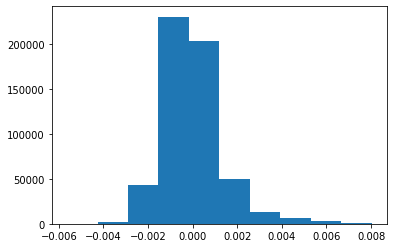

In [37]:
plt.hist(components_masked[4], bins=10)

In [38]:
component_img = masker.inverse_transform(components_masked)

In [39]:
component_img.shape

(91, 109, 91, 30)

In [40]:
first_component = image.index_img(component_img, 1)
print(first_component.shape)

(91, 109, 91)


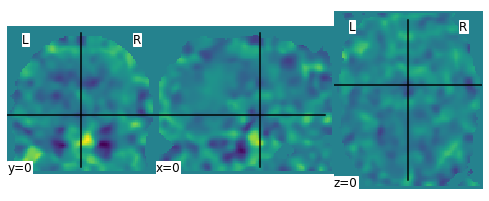

In [41]:
nilearn.plotting.plot_img(first_component, cut_coords=(0,0,0))

In [25]:
from nilearn import image
from nilearn.plotting import plot_stat_map, show

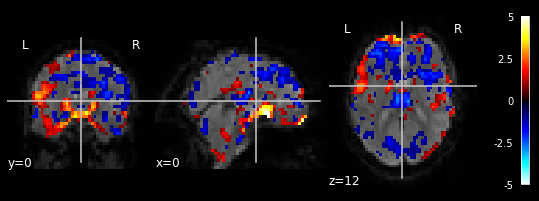

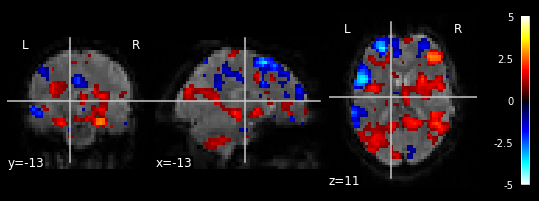

In [27]:

# Use the mean as a background
mean_img = image.mean_img(subject_path)

plot_stat_map(image.index_img(component_img, 0), mean_img)

plot_stat_map(image.index_img(component_img, 1), mean_img)

show()